# Image classification using CNN

A Convolutional Neural Network (CNN) is a type of deep learning model particularly well-suited for tasks involving image data, though it can also be applied to other types of structured data. CNNs are designed to automatically and adaptively learn spatial hierarchies of features through convolutional layers, pooling layers, and fully connected layers. Here’s an overview of the key components and concepts in CNNs:

Convolutional Layers: These layers detect features in the image, such as edges and textures, using small filters that scan the image.

Pooling Layers: These reduce the size of the image data, keeping important information while making the model faster and more efficient.

Fully Connected Layers: After feature extraction, these layers classify the image based on the features.

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

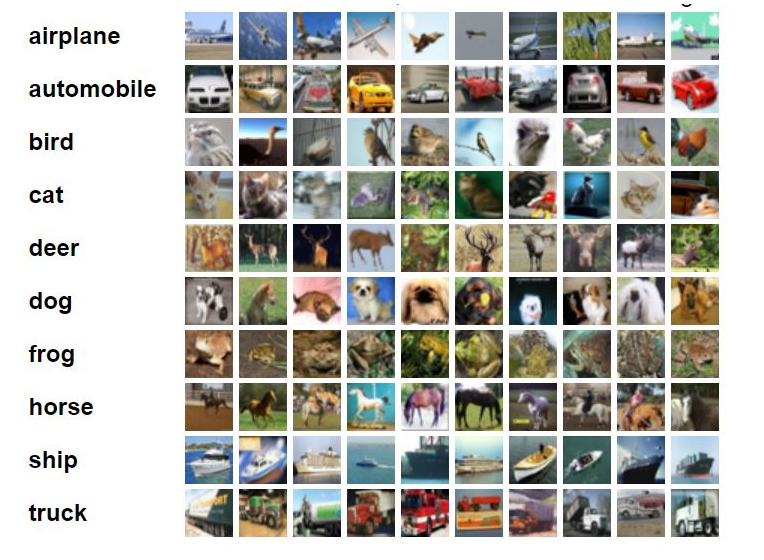

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Lets Plot some images 

In [9]:
def showimg(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

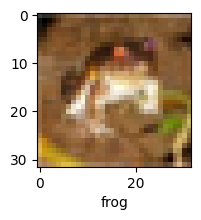

In [10]:
showimg(X_train, y_train,0)

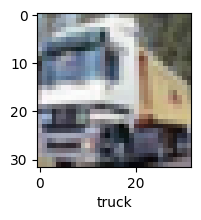

In [11]:
showimg(X_train, y_train,1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),# --> 1st hidden layer
        layers.Dense(1000, activation='relu'),# --> 2nd hidden layer
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



C:\Users\Rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.fit(X_train, y_train, epochs=5)

You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.62      0.57      1000
           1       0.55      0.67      0.60      1000
           2       0.44      0.24      0.31      1000
           3       0.36      0.30      0.32      1000
           4       0.51      0.26      0.35      1000
           5       0.48      0.27      0.35      1000
           6       0.40      0.73      0.52      1000
           7       0.46      0.63      0.53      1000
           8       0.69      0.53      0.60      1000
           9       0.51      0.61      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



Now will try CNN and will see the accuracy 

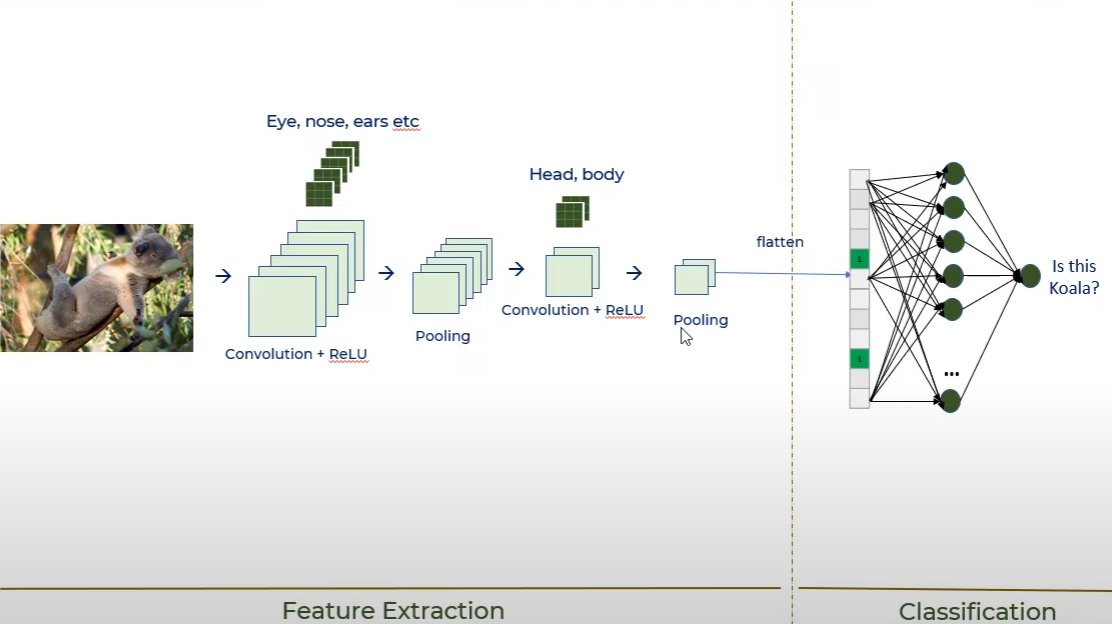

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),# it will extract the features from the images
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # hidden layers
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer='adam',# --> is an iterative optimization algorithm used to minimize the loss function during the training of neural networks.
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4144 - loss: 1.6159
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6212 - loss: 1.0872
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6740 - loss: 0.9395
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7080 - loss: 0.8362
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7381 - loss: 0.7570


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1000
           1       0.69      0.87      0.77      1000
           2       0.70      0.46      0.56      1000
           3       0.55      0.47      0.51      1000
           4       0.61      0.68      0.64      1000
           5       0.68      0.53      0.60      1000
           6       0.75      0.78      0.76      1000
           7       0.67      0.78      0.72      1000
           8       0.73      0.86      0.79      1000
           9       0.86      0.64      0.73      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



Through CNN we have achieved 69% accuracy

In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6905 - loss: 0.9203


[0.9241663813591003, 0.6862000226974487]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[6.6338149e-03, 9.5747277e-04, 8.5379364e-04, 8.5489494e-01,
        3.4582075e-03, 6.6254407e-02, 6.1668731e-02, 3.3298926e-04,
        4.2344388e-03, 7.1126543e-04],
       [3.3612899e-02, 1.6459070e-02, 1.9080644e-05, 3.8064474e-05,
        3.7158996e-05, 2.5670494e-07, 3.8407526e-07, 6.8350893e-08,
        9.4946307e-01, 3.6996126e-04],
       [1.5563545e-01, 1.0643468e-01, 3.0729859e-03, 3.4847057e-03,
        5.5503692e-03, 2.8505625e-04, 2.0073893e-04, 1.7239499e-03,
        7.1892083e-01, 4.6912860e-03],
       [7.5393772e-01, 5.6685448e-02, 1.2290709e-03, 1.9436695e-04,
        1.9529380e-02, 8.7518112e-07, 9.2257542e-05, 2.0422720e-04,
        1.6794892e-01, 1.7770375e-04],
       [1.9293453e-05, 1.2242720e-03, 1.5939834e-02, 1.7423769e-02,
        1.4849357e-01, 3.2305340e-03, 8.1335139e-01, 7.2224143e-06,
        2.9394423e-04, 1.6122560e-05]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]# argmax gives the index of the max value frorm 2D aaray
y_classes[:5]

[3, 8, 8, 0, 6]

In [46]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [44]:
classes[y_classes[1]]

'ship'

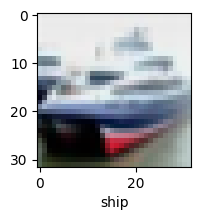

In [43]:
y_test=y_test.reshape(-1,)
showimg(X_test, y_test,1)

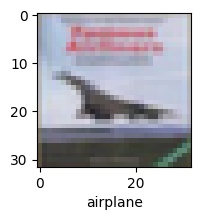

In [47]:
showimg(X_test, y_test,3)

In [48]:
classes[y_classes[3]]

'airplane'